## Importations

In [55]:
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns

In [56]:
Base = pd.read_csv('Projet-2A/datas/chocolateries.csv')
niveau = pd.read_csv('Projet-2A/datas/niveau_de_vie_commune.csv', delimiter=';')
convertisseur = pd.read_csv('Projet-2A/datas/correspondance-code-insee-code-postal.csv',delimiter=';')

## La petite couronne

In [57]:
final = convertisseur.loc[convertisseur['Code Département'].isin(['75','92','93','94'])]
final

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,ID Geofla,Code Commune,Code Canton,Code Arrondissement,Code Département,Code Région
89,93008,93000,BOBIGNY,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Préfecture,48.0,674.0,48.5,"48.907688243955754,2.438639827268387","{""coordinates"": [[[2.4277240402745033, 48.8958...",12799,8,7,1,93,11
192,94018,94220,CHARENTON-LE-PONT,VAL-DE-MARNE,ILE-DE-FRANCE,Chef-lieu canton,43.0,183.0,28.8,"48.82280849782191,2.407609154768574","{""coordinates"": [[[2.415904474059502, 48.81633...",16854,18,7,1,94,11
322,75110,75010,PARIS-10E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,45.0,288.0,95.9,"48.87602855694339,2.361112904561707","{""coordinates"": [[[2.363856758564782, 48.86743...",8429,110,24,1,75,11
328,92063,92500,RUEIL-MALMAISON,HAUTS-DE-SEINE,ILE-DE-FRANCE,Chef-lieu canton,77.0,1453.0,79.1,"48.86918973711631,2.177340631498934","{""coordinates"": [[[2.15986759327731, 48.847721...",28508,63,99,2,92,11
436,75116,75016,PARIS-16E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,43.0,1641.0,169.4,"48.86039876035177,2.262099559395783","{""coordinates"": [[[2.262784637049641, 48.83392...",36580,116,30,1,75,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35459,94047,94520,MANDRES-LES-ROSES,VAL-DE-MARNE,ILE-DE-FRANCE,Commune simple,90.0,337.0,4.4,"48.70588801740378,2.548307416139081","{""coordinates"": [[[2.544309615345726, 48.69845...",28687,47,26,1,94,11
35608,93057,93320,LES PAVILLONS-SOUS-BOIS,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,56.0,293.0,21.2,"48.90820602525632,2.502974482665042","{""coordinates"": [[[2.49983721841802, 48.895742...",21208,57,22,1,93,11
36000,93053,93130,NOISY-LE-SEC,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,69.0,503.0,39.3,"48.89132246295204,2.459136473721034","{""coordinates"": [[[2.464761047295888, 48.87807...",20206,53,20,1,93,11
36683,75114,75014,PARIS-14E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,63.0,560.0,137.2,"48.82899321160942,2.327100883257538","{""coordinates"": [[[2.343909438065682, 48.81575...",32539,114,28,1,75,11


## On ne conserve que les variables intéressantes

In [58]:
niveau_vie = niveau[['CODGEO','MED14']]
liste_departements=["75", "92", "93", "94"]
department=[]

for ville in niveau_vie.CODGEO:
    department.append(ville[:2])

niveau_vie['departement']=department
niveau_vie=niveau_vie[niveau_vie.departement.isin(liste_departements)]
niveau_vie = niveau_vie.reset_index(drop = True)
ndv = []
for med14 in niveau_vie.MED14:
    ndv.append(float(med14.replace(',','.')))
niveau_vie['MED14']=ndv
niv = niveau_vie.rename(columns={'CODGEO' : 'Code INSEE'})
niv

,Code INSEE,MED14,departement
0,75056,26194.7,75
1,75101,31574.5,75
2,75102,29296.0,75
3,75103,30560.7,75
4,75104,30385.5,75
...,...,...,...
139,94077,20428.7,94
140,94078,15491.9,94
141,94079,21081.3,94
142,94080,30530.7,94


In [59]:
pref = pd.merge(niv,final,on='Code INSEE')
pref = pref[['MED14', 'Code INSEE', 'Code Postal','Population']]
pref['Code INSEE'] = pref['Code INSEE'].astype(str).astype(float)
pref

,MED14,Code INSEE,Code Postal,Population
0,31574.5,75101.0,75001,17.6
1,29296.0,75102.0,75002,22.4
2,30560.7,75103.0,75003,35.7
3,30385.5,75104.0,75004,28.2
4,32717.5,75105.0,75005,61.5
...,...,...,...,...
138,20428.7,94077.0,94290,18.5
139,15491.9,94078.0,94190,31.0
140,21081.3,94079.0,94350,27.3
141,30530.7,94080.0,94300,48.7


In [60]:
boucheries = Base.groupby(["codeCommuneEtablissement"])["codeCommuneEtablissement"].count()
boucheries = boucheries.to_frame('Boucheries')
boucheries['Code Postal']=boucheries.index
boucheries = boucheries.rename(columns= {'codeCommuneEtablissement' : 'Code Postal'})
boucheries['Code Postal'] = boucheries['Code Postal'].astype(str).astype(float)
boucheries

,Boucheries,Code Postal
codeCommuneEtablissement,,
75101,8,75101.0
75102,5,75102.0
75103,2,75103.0
75104,4,75104.0
75105,4,75105.0
...,...,...
95563,2,95563.0
95572,1,95572.0
95582,1,95582.0


In [61]:
pref = pd.merge(pref,boucheries,left_on='Code INSEE',right_on='Code Postal')
pref['MED14'] = pref['MED14'].astype(float)
pref['Boucheriesparhabitants']=pref['Boucheries']/pref['Population']
pref

,MED14,Code INSEE,Code Postal_x,Population,Boucheries,Code Postal_y,Boucheriesparhabitants
0,31574.5,75101.0,75001,17.6,8,75101.0,0.454545
1,29296.0,75102.0,75002,22.4,5,75102.0,0.223214
2,30560.7,75103.0,75003,35.7,2,75103.0,0.056022
3,30385.5,75104.0,75004,28.2,4,75104.0,0.141844
4,32717.5,75105.0,75005,61.5,4,75105.0,0.065041
...,...,...,...,...,...,...,...
70,28809.1,94068.0,94100/94210,75.3,2,94068.0,0.026560
71,25180.4,94071.0,94370,25.9,1,94071.0,0.038610
72,21081.3,94079.0,94350,27.3,2,94079.0,0.073260
73,30530.7,94080.0,94300,48.7,5,94080.0,0.102669


## Régression linéaire

In [62]:
result = sm.ols(formula="Boucheriesparhabitants ~ MED14", data=pref).fit()
print(result.params)

Intercept   -0.036303
MED14        0.000004
dtype: float64


<AxesSubplot: xlabel='MED14', ylabel='Boucheriesparhabitants'>

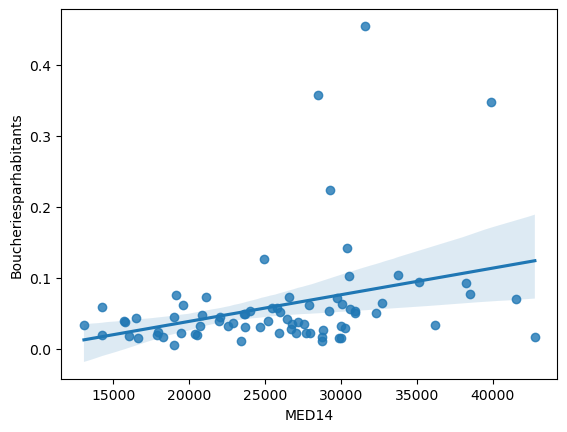

In [63]:
sns.regplot(x='MED14', y='Boucheriesparhabitants', data=pref)